In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1 - age (numeric)
2 - job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','
student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)
4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unk
nown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - balance:
7 - housing: has housing loan? (categorical: 'no','yes','unknown')
8 - loan: has personal loan? (categorical: 'no','yes','unknown')

9 - contact: contact communication type (categorical: 'cellular','telephone')
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly
affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a
call is performed. Also, after the end of the call y is obviously known. Thus, this input should
only be included for benchmark purposes and should be discarded if the intention is to have a
realistic predictive model

In [2]:
import io
%cd '/Users/shiv/Documents/datasets/Ml Marathon dataset'

/Users/shiv/Documents/datasets/Ml Marathon dataset


In [3]:
train_data = pd.read_csv('data.csv')

In [4]:
test_data = pd.read_csv('test_data.csv')

In [5]:
train_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes


In [6]:
test_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown


In [7]:
print(train_data.shape)
print(test_data.shape)

(8371, 17)
(2791, 16)


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2791 non-null   int64 
 1   job        2791 non-null   object
 2   marital    2791 non-null   object
 3   education  2791 non-null   object
 4   default    2791 non-null   object
 5   balance    2791 non-null   int64 
 6   housing    2791 non-null   object
 7   loan       2791 non-null   object
 8   contact    2791 non-null   object
 9   day        2791 non-null   int64 
 10  month      2791 non-null   object
 11  duration   2791 non-null   int64 
 12  campaign   2791 non-null   int64 
 13  pdays      2791 non-null   int64 
 14  previous   2791 non-null   int64 
 15  poutcome   2791 non-null   object
dtypes: int64(7), object(9)
memory usage: 349.0+ KB


# EDA (Exploratory Data Analysis)

In [10]:
import seaborn as sns

In [11]:
import plotly.express as px

In [12]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


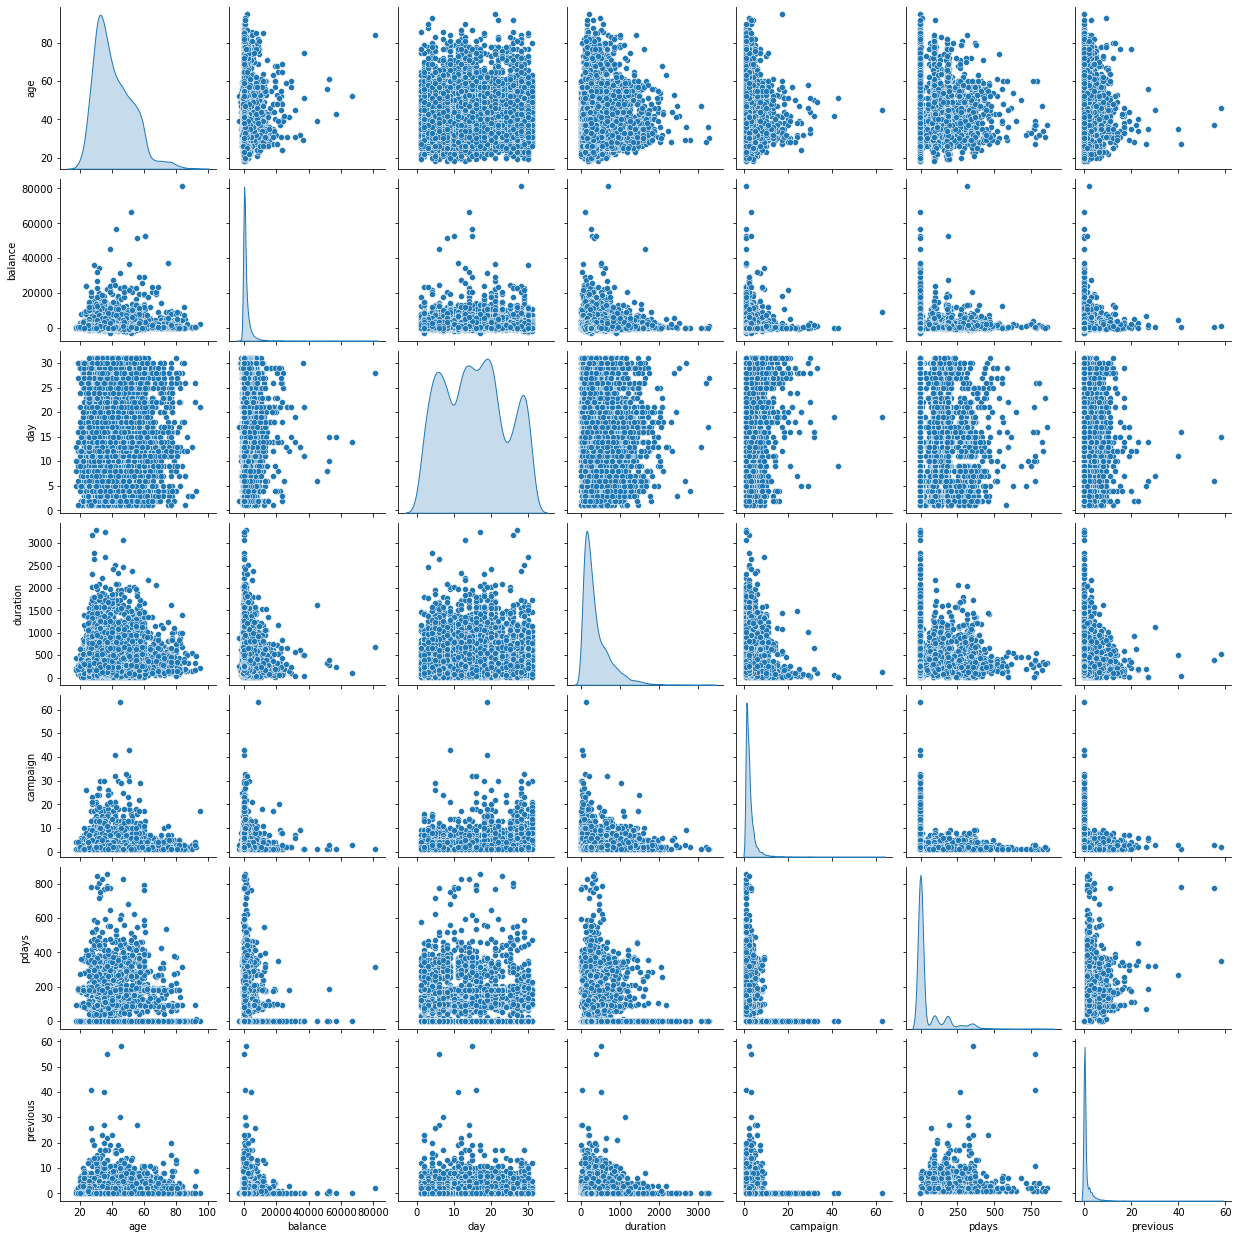

In [13]:
sns.pairplot(train_data,diag_kind='kde')

<AxesSubplot:xlabel='job', ylabel='count'>

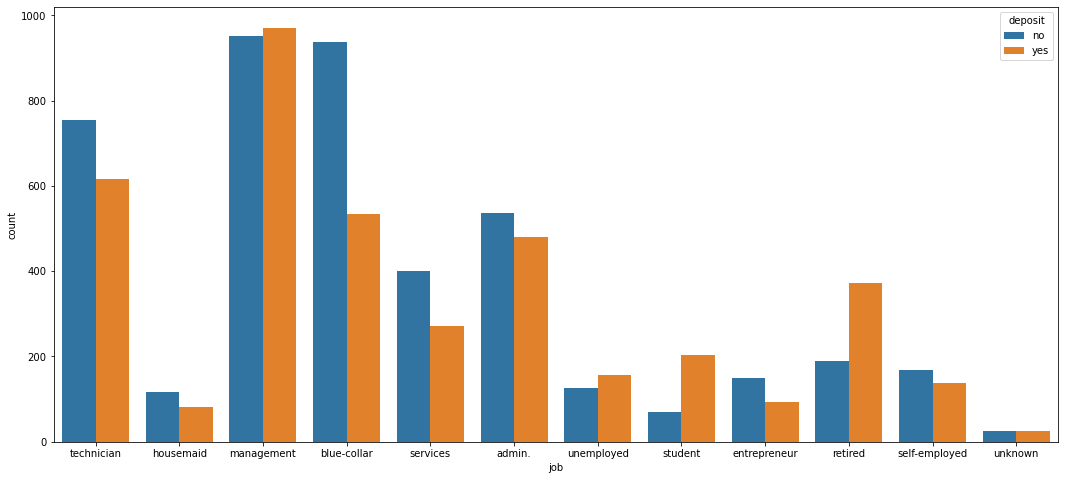

In [96]:
plt.figure(figsize=(18,8))
sns.countplot(x='job',
             hue='deposit',
             data=train_data)

<AxesSubplot:xlabel='marital', ylabel='count'>

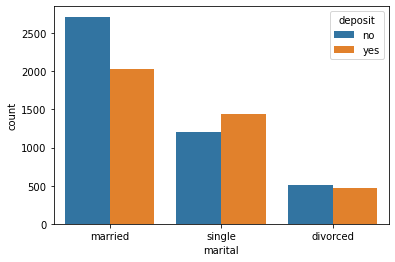

In [15]:
sns.countplot(x='marital',
             hue='deposit',
             data=train_data)

<AxesSubplot:xlabel='education', ylabel='count'>

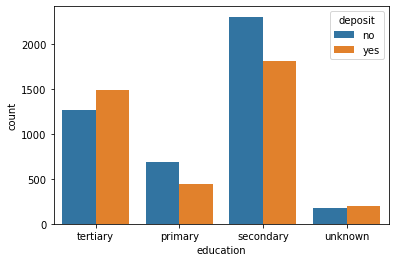

In [16]:
sns.countplot(x='education',
             hue = 'deposit',
             data=train_data)

<AxesSubplot:xlabel='month', ylabel='count'>

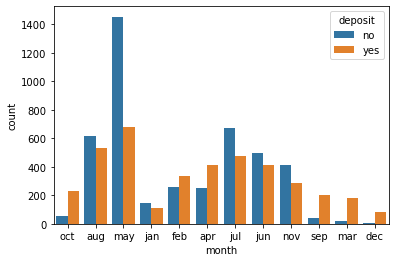

In [116]:
sns.countplot(x='month',
             hue='deposit',
             data = train_data)

<AxesSubplot:ylabel='Frequency'>

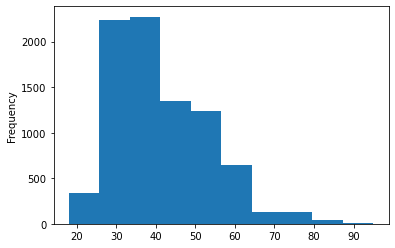

In [18]:
train_data.age.plot.hist()

In [19]:
train_data.job.value_counts(normalize=True)

management       0.229722
blue-collar      0.175845
technician       0.163780
admin.           0.121491
services         0.080158
retired          0.067256
self-employed    0.036674
unemployed       0.033688
student          0.032613
entrepreneur     0.029148
housemaid        0.023534
unknown          0.006092
Name: job, dtype: float64

<AxesSubplot:ylabel='deposit'>

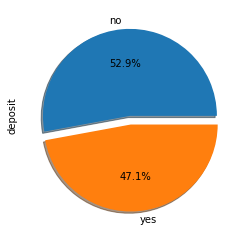

In [20]:
train_data['deposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

# Data preprocessing

In [21]:
train_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no


In [22]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [23]:
test_data['deposit'] = 'test'

In [24]:
combinedata = pd.concat([train_data,test_data],axis=0)

In [25]:
combinedata.shape

(11162, 17)

In [26]:
numcols = combinedata.select_dtypes(include=np.number)
object_cols = combinedata.select_dtypes(include='object')

In [27]:
numcols.head(3)

,age,balance,day,duration,campaign,pdays,previous
0,38,127,14,113,1,50,2
1,41,365,8,203,5,-1,0
2,39,2454,4,716,3,263,2


In [28]:
numcols.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.232664,1528.544257,15.658484,371.993818,2.508421,51.330407,0.832557
std,11.913009,3225.411298,8.420508,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [29]:
object_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,technician,married,tertiary,no,yes,no,cellular,oct,success,no
1,housemaid,married,primary,no,no,no,cellular,aug,unknown,no
2,management,single,tertiary,no,yes,no,cellular,may,failure,yes
3,blue-collar,married,primary,no,yes,no,cellular,may,unknown,no
4,services,married,secondary,no,yes,yes,cellular,jan,failure,no
...,...,...,...,...,...,...,...,...,...,...
2786,management,single,tertiary,yes,yes,no,cellular,nov,unknown,test
2787,management,single,tertiary,no,yes,no,cellular,mar,unknown,test
2788,admin.,divorced,secondary,no,no,no,cellular,jan,unknown,test
2789,student,single,unknown,no,no,no,cellular,aug,unknown,test


Missing value imputation-:

In [30]:
object_cols.isnull().sum()
# data have no null values but it contains unknown values

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
deposit      0
dtype: int64

Label encoding -:

In [31]:
numcols['deposit'] = object_cols.deposit

In [32]:
object_cols = object_cols.drop('deposit',axis=1)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [35]:
object_cols_encode = object_cols.apply(le.fit_transform)

In [36]:
object_cols_encode

,job,marital,education,default,housing,loan,contact,month,poutcome
0,9,1,2,0,1,0,0,10,2
1,3,1,0,0,0,0,0,1,3
2,4,2,2,0,1,0,0,8,0
3,1,1,0,0,1,0,0,8,3
4,7,1,1,0,1,1,0,4,0
...,...,...,...,...,...,...,...,...,...
2786,4,2,2,1,1,0,0,9,3
2787,4,2,2,0,1,0,0,7,3
2788,0,0,1,0,0,0,0,4,3
2789,8,2,3,0,0,0,0,1,3


In [37]:
combinedata_clean = pd.concat([object_cols_encode,numcols],axis=1)

In [38]:
combinedata_clean.shape

(11162, 17)

In [39]:
combinedata_clean.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,deposit
0,9,1,2,0,1,0,0,10,2,38,127,14,113,1,50,2,no
1,3,1,0,0,0,0,0,1,3,41,365,8,203,5,-1,0,no
2,4,2,2,0,1,0,0,8,0,39,2454,4,716,3,263,2,yes


In [40]:
combinedata_clean.deposit = combinedata_clean.deposit.replace(['no' , 'yes'],[0,1])

In [41]:
train_data_df = combinedata_clean[combinedata_clean.deposit != 'test']
test_data_df = combinedata_clean[combinedata_clean.deposit == 'test']

In [42]:
train_data_df.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,deposit
0,9,1,2,0,1,0,0,10,2,38,127,14,113,1,50,2,0
1,3,1,0,0,0,0,0,1,3,41,365,8,203,5,-1,0,0
2,4,2,2,0,1,0,0,8,0,39,2454,4,716,3,263,2,1


In [43]:
test_data_df.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous,deposit
0,1,2,1,1,0,0,0,9,0,31,477,20,426,2,189,6,test
1,1,1,0,0,0,0,0,5,3,49,599,23,464,1,-1,0,test
2,6,2,2,0,0,1,0,8,3,51,400,27,200,1,-1,0,test


In [44]:
test_data_df = test_data_df.drop('deposit',axis=1)

Modeling

In [45]:
y = train_data_df.deposit
X = train_data_df.drop('deposit',axis=1)

In [46]:
y = y.astype('int')

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log = LogisticRegression()

In [49]:
logmodel = log.fit(X,y)

/Users/shiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
logmodel.score(X,y)

0.7586907179548441

In [51]:
logmodel_predict = logmodel.predict(X)

In [52]:
pd.crosstab(y,logmodel_predict)

col_0,0,1
deposit,,
0,3561,867
1,1153,2790


Decision tree -:

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
tree = DecisionTreeClassifier()

In [55]:
trrmodel = tree.fit(X,y)

In [56]:
trrmodel.score(X,y)

1.0

In [57]:
trrmodel_predict = trrmodel.predict(X)

In [58]:
pd.crosstab(y,trrmodel_predict)

col_0,0,1
deposit,,
0,4428,0
1,0,3943


In [59]:
trrmodel.feature_importances_

array([0.03119064, 0.01481419, 0.01521498, 0.00058622, 0.0375354 ,
       0.00818978, 0.06066865, 0.09425835, 0.03493802, 0.077325  ,
       0.08219693, 0.07277149, 0.35705232, 0.0295992 , 0.05456601,
       0.02909284])

In [60]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'age', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous'],
      dtype='object')

Random Forest -:

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
forest = RandomForestClassifier(n_estimators=2000)

In [63]:
forest_model = forest.fit(X,y)

In [64]:
forest_model.score(X,y)

1.0

In [65]:
forest_model_predict = forest_model.predict(X)

In [66]:
pd.crosstab(y,forest_model_predict)

col_0,0,1
deposit,,
0,4428,0
1,0,3943


Gradient boosting -:

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
Gb = GradientBoostingClassifier(n_estimators=2000,max_depth=4,learning_rate=0.01)

In [69]:
Gb_model = Gb.fit(X,y)

In [70]:
Gb_model.score(X,y)

0.8904551427547486

In [71]:
Gb_model_predict = Gb_model.predict(X)

In [72]:
pd.crosstab(y,Gb_model_predict)

col_0,0,1
deposit,,
0,3867,561
1,356,3587


In [73]:
from xgboost import XGBClassifier

In [74]:
Xgb=XGBClassifier(n_estimators=1500)

In [75]:
Xgb_model = Xgb.fit(X,y)

In [76]:
Xgb_model.score(X,y)

1.0

In [77]:
Xgb_model_predict = Xgb_model.predict(X)

In [78]:
pd.crosstab(y,Xgb_model_predict)

col_0,0,1
deposit,,
0,4428,0
1,0,3943
